Import Libraries and Data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("BrentOilPrices.csv")
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format="mixed")
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


Text(0.5, 1.0, 'Brent Oil Price Trend')

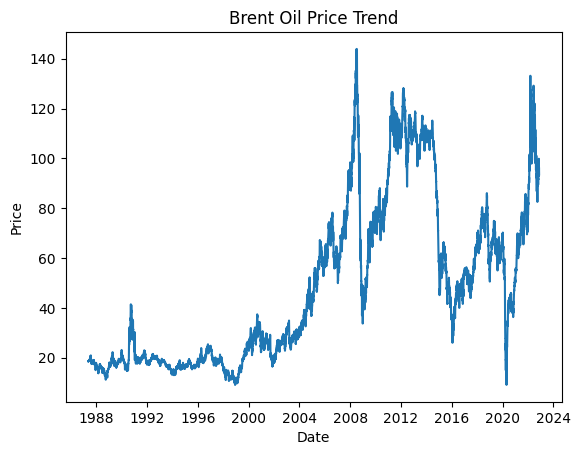

In [4]:
g = sns.lineplot(x="Date", y="Price", data=df)
plt.title("Brent Oil Price Trend")

In [5]:
def plot_price_trend(df, start_date, end_date):

    mask = (df["Date"] > start_date) & (df["Date"] <= end_date)
    sdf = df.loc[mask]
    plt.figure(figsize=(10, 4))
    chart = sns.lineplot(x="Date", y="Price", data=sdf)
    plt.title("Brent Oil Price Trend")

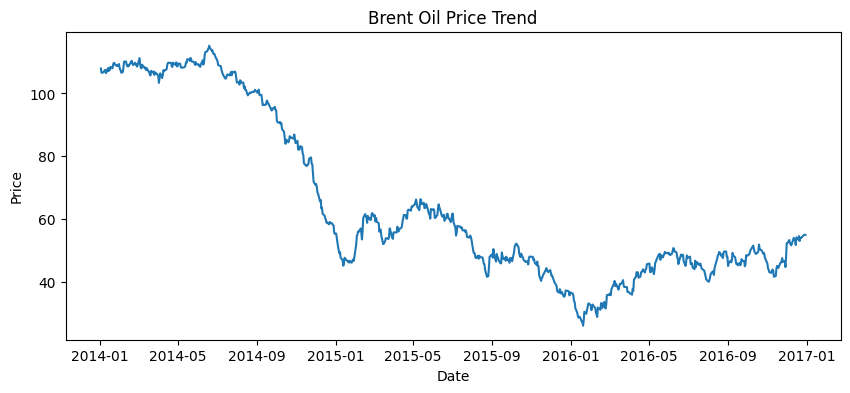

In [6]:
plot_price_trend(df, "2014-01-01", "2017-01-01")

In [7]:
from statsmodels.tsa.arima_model import ARIMA  # ARIMA Modeling
from statsmodels.tsa.stattools import (
    adfuller,
)
from statsmodels.tsa.stattools import (
    acf,
    pacf,
)
from statsmodels.tsa.seasonal import (
    seasonal_decompose,
)

In [9]:
arima_df = df.set_index("Date")
arima_df.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [14]:
# Perform Augmented Dickey–Fuller test to check if the given Time series is stationary:
def test_stationarity(ts):

    # Determing rolling statistics
    rolmean = ts.rolling(window=12).mean()
    rolstd = ts.rolling(window=12).std()

    # Plot rolling statistics:
    orig = plt.plot(ts, color="blue", label="Original")
    mean = plt.plot(rolmean, color="red", label="Rolling Mean")
    std = plt.plot(rolstd, color="black", label="Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(ts["Price"], autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

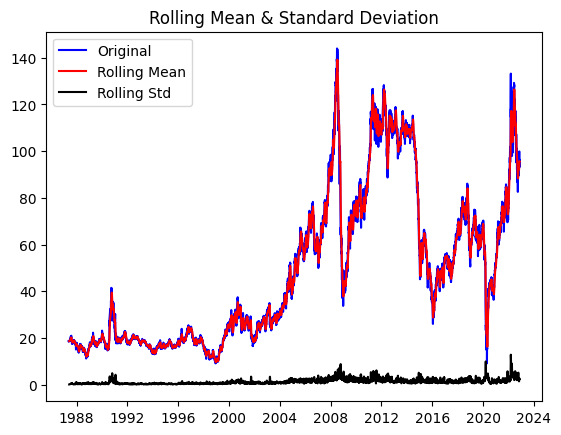

Results of Dickey-Fuller Test:
Test Statistic                   -1.993856
p-value                           0.289274
#Lags Used                       29.000000
Number of Observations Used    8981.000000
Critical Value (1%)              -3.431078
Critical Value (5%)              -2.861862
Critical Value (10%)             -2.566941
dtype: float64


In [15]:
test_stationarity(arima_df)

We see that the Test Statistic (-1.95) is higher than 10% Critical Value (-2.56). This means this result is statistically significant at 90% confidence interval and so the time series is not stationary.

Correlation - Describes how much two variables depend on each other.

Partial Correlation - When multiple variables are involved, two variables may have direct relation as well as indirect relation (i.e x1 and x3 are related and x2 and x3 are related. Due to this indirect relation, x1 and x2 might be related). This is called partial correlation.

Auto Correlation - In a time series data, variable at a time step is dependent upon its lag values. This is called auto-correlation (i.e. variable depending upon its own values)

Partial Autocorrelation - describes correlation of a variable with its lag values after removing the effect of indirect correlation.


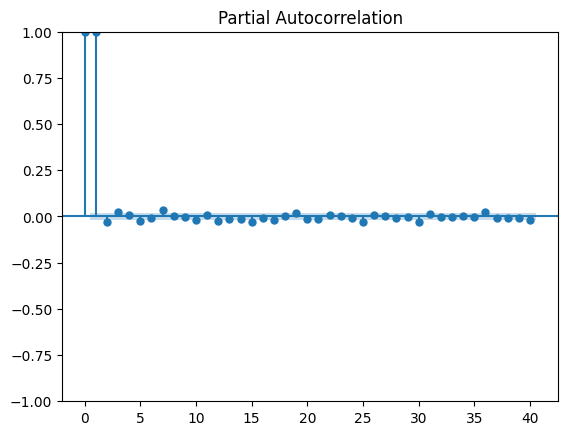

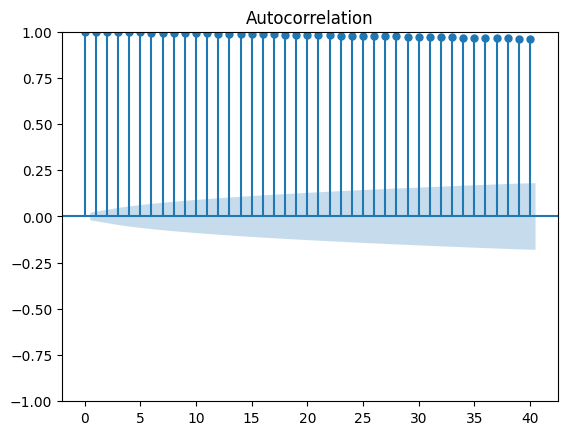

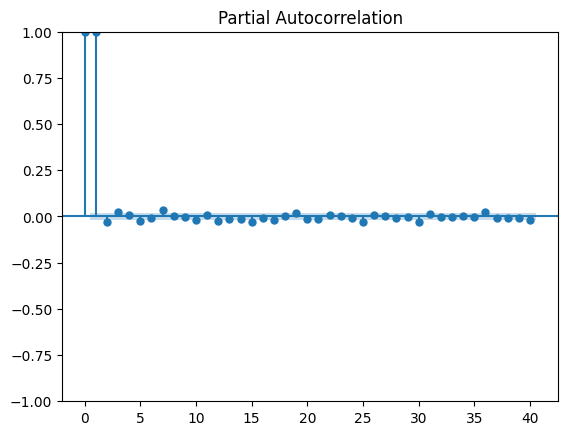

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(arima_df)
plot_pacf(arima_df)

In [19]:
# Implementing own function to create ACF plot
def get_acf_plot(ts):
    # calling acf function from stattools
    y = ts["Price"]
    lag_acf = acf(y, nlags=500)
    plt.figure(figsize=(16, 7))
    plt.plot(lag_acf, marker="o")
    plt.axhline(y=0, linestyle="--", color="blue")
    plt.axhline(y=-1.96 / np.sqrt(len(y)), linestyle="--", color="blue")
    plt.axhline(y=1.96 / np.sqrt(len(y)), linestyle="--", color="blue")
    plt.title("Autocorrelation Function")
    plt.xlabel("number of lags")
    plt.ylabel("correlation")


def get_pacf_plot(ts):
    # calling pacf function from stattools
    y = arima_df["Price"]
    lag_pacf = pacf(y, nlags=50)
    plt.figure(figsize=(16, 7))
    plt.plot(lag_pacf, marker="o")
    plt.axhline(y=0, linestyle="--", color="blue")
    plt.axhline(y=-1.96 / np.sqrt(len(y)), linestyle="--", color="blue")
    plt.axhline(y=1.96 / np.sqrt(len(y)), linestyle="--", color="blue")
    plt.title("Partial Autocorrelation Function")
    plt.xlabel("number of lags")
    plt.ylabel("correlation")

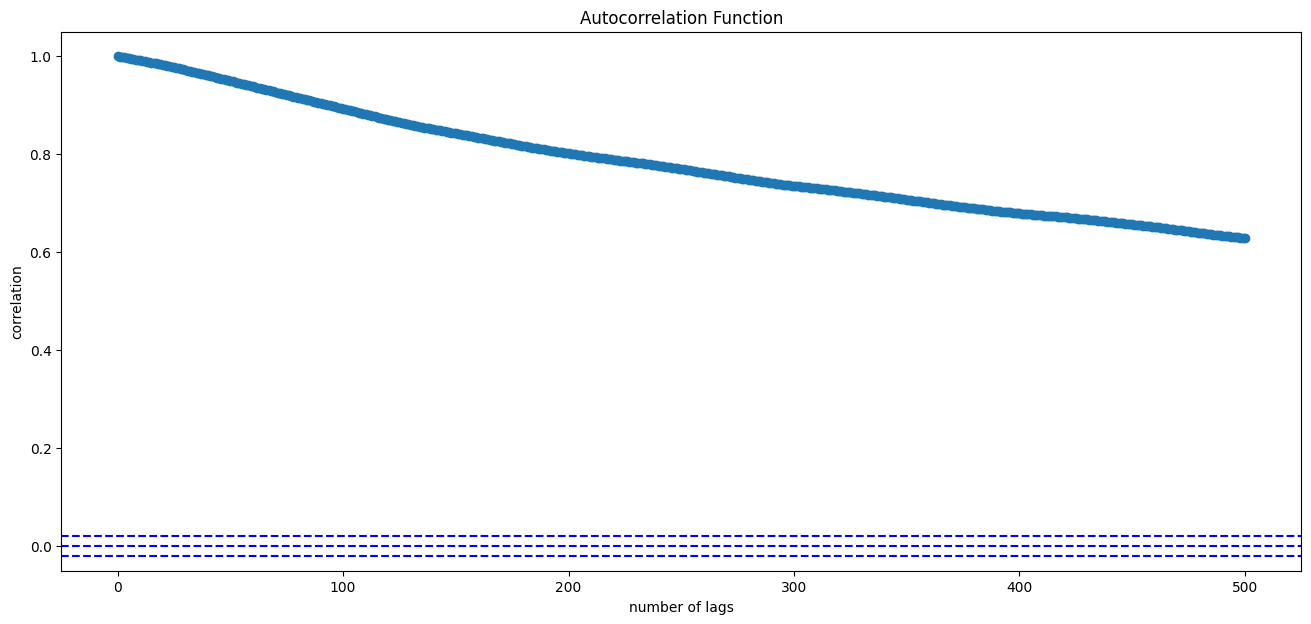

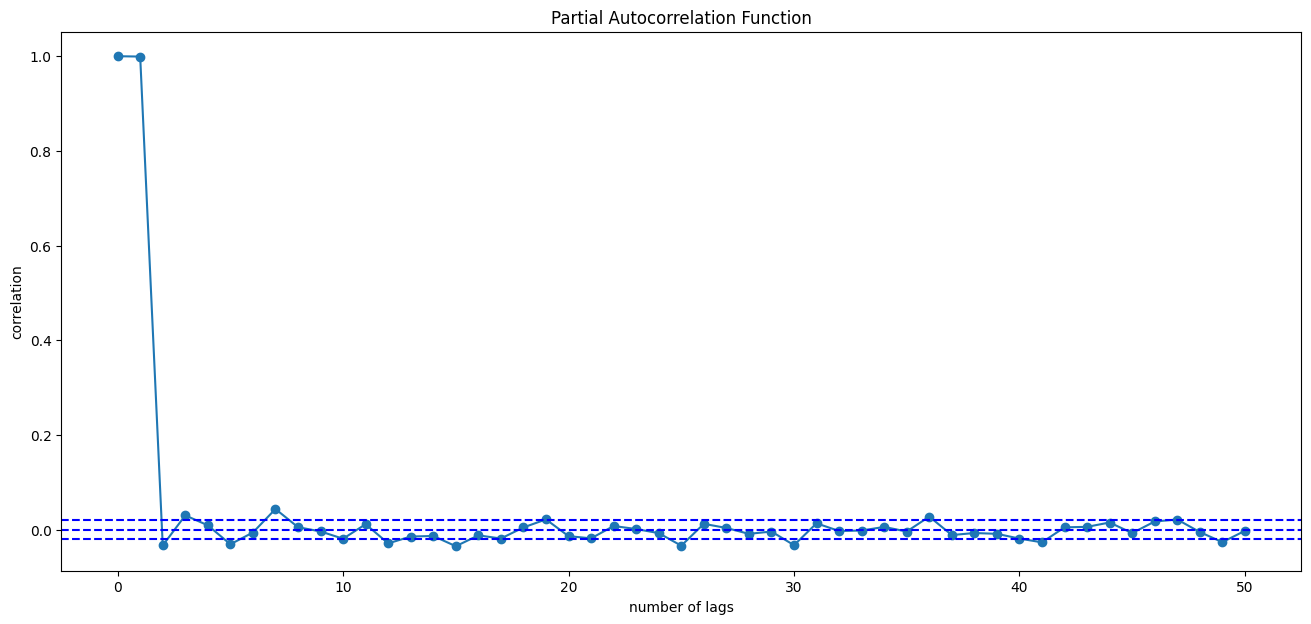

In [20]:
get_acf_plot(arima_df)
get_pacf_plot(arima_df)